### 개의 품종 분류
- 딥러닝 팀 프로젝트
- 데이터 출처 : https://www.kaggle.com/datasets/amandam1/120-dog-breeds-breed-classification

1) 모듈 준비, 데이터 준비
2) 이미지 파일 픽셀값 전처리 (흑백으로 변환) -> 크기가 많이 클 경우, DataFrame으로 저장 후 csv 파일로 저장
3) 데이터 전처리 - 피쳐 / 타겟 분리, 정규화
4) 학습 데이터셋 준비
    1. 사용자 정의 데이터셋 및 전체 데이터셋 준비
    2. 학습용, 검증용, 테스트용 데이터셋 준비
5) 데이터 로더 생성 (학습용, 검증용, 테스트용)
6) 모델 클래스 정의
7) 함수 정의 (학습, 검증, 테스트)
8) 학습, 학습 후 평가 (평가척도)
9) 테스트
10) 학습 스케줄러
11) 모델 저장 (불러와서 실행할 수 있게 하기 위해)

In [102]:
import os, sys
from PIL import Image
Image.ANTIALIAS = Image.LANCZOS

In [10]:
print(os.getcwd())

C:\Users\kdp\PycharmProjects\KDT_08_Deep_Learning\WORK_DL\WORK_TEAM_PROJECT


In [27]:
def resize_and_crop(img_path, modified_path, size, crop_type='middle'):
    files = os.listdir(img_path)    # 파일명 리스트 (list)
    
    if not os.path.exists(modified_path):
        os.makedirs(modified_path)  # resize 이미지가 저장될 폴더가 없을 경우 폴더 생성
    
    for file in files:
        # name = str(file)
        # os.chdir(img_path)
        img = Image.open(img_path + '/' + file)           # <class 'PIL.JpegImagePlugin.JpegImageFile'>
        img_ratio = img.size[0] / float(img.size[1])    # 해당 이미지 비율
        ratio = size[0] / float(size[1])                # 목표 이미지 비율
        
        if ratio > img_ratio:
            img = img.resize((size[0], int(round(size[0] * img.size[1] / img.size[0]))),   
                             Image.ANTIALIAS)
            if crop_type == 'middle':
                box = (0, int(round((img.size[1] - size[1]) / 2)), 
                       img.size[0], int(round((img.size[1] + size[1]) / 2)))
            img = img.crop(box)
        elif ratio < img_ratio:
            img = img.resize((int(round(size[1] * img.size[0] / img.size[1])), size[1]),
                             Image.ANTIALIAS)
            if crop_type == 'middle':
                box = (int(round((img.size[0] - size[0]) / 2)), 0, 
                       int(round((img.size[0] + size[0]) / 2)), img.size[1])
            img = img.crop(box)
        else:
            img = img.resize((size[0], size[1]), Image.ANTIALIAS)
        
        # os.chdir(modified_path)
        img.save(modified_path + '/' + file)

In [14]:
def print_files(img_path, modified_path):
    files = os.listdir(img_path)    # 파일명 리스트 (list)
    
    if not os.path.exists(modified_path):
        os.makedirs(modified_path)  # resize 이미지가 저장될 폴더가 없을 경우 생성
    
    for file in files:
        print(img_path + '/' + file)

In [37]:
size = 64, 64
path2 = "./Images"
modified_path2 = "./Images-resized"
for folder in os.listdir(path2):
    # print(path2 + folder)
    resize_and_crop(path2 + '/' + folder, modified_path2 + '/' + folder, size)

OSError: cannot write mode RGBA as JPEG

In [4]:
# size = 128, 128 # 바꾸고 싶은 사이즈
# path = "./dog-breeds/rottweiler/"  # 이미지 경로
# modified_path = "./dog-breeds-resized/rottweiler/"    # resize된 이미지가 저장될 경로
# resize_and_crop(path, modified_path, size)

In [40]:
# resize 예제
# test_img = Image.open('./dog-breeds/beagle/beagle1.jpg')
# resized_img = test_img.resize((128, 128), Image.LANCZOS)
# resized_img.save('output_image.jpg')

In [29]:
import torch
import torchvision.transforms.functional as TF
import numpy as np
import pandas as pd

def convert_to_grayscale_tensor(image_path):
    """ 컬러 이미지를 그레이스케일로 변환 후, 텐서로 저장하는 함수 """
    
    # Pillow로 컬러이미지 읽어오기
    color_image = Image.open(image_path)
    
    # 이미지를 grayscale로 변환
    grayscale_image = color_image.convert('L')
    
    # 이미지를 PyTorch 텐서로 변환 (+ 0~1 범위로 정규화)
    image_tensor = TF.to_tensor(grayscale_image)
    print(type(image_tensor), image_tensor.shape)


def convert_to_grayscale_array(image_path):
    """ 컬러 이미지를 그레이스케일로 변환 후, 1차원 리스트로 저장하는 함수 """
    
    # Pillow로 컬러이미지 읽어오기
    color_image = Image.open(image_path)
    
    # 이미지를 grayscale로 변환
    grayscale_image = color_image.convert('L')
    
    # 이미지 -> ndarray -> list
    image_array = np.array(grayscale_image)
    image_array =  image_array.reshape(-1)
    image_list = image_array.tolist()
    # print(type(image_list), len(image_list))
    
    return image_list   # 1차원 리스트 반환


def save_tensor_as_image(tensor, file_path):
    """ 텐서를 이미지 파일로 저장하는 함수 """
    
    # 텐서를 이미지로 변환
    image = TF.to_pil_image(tensor)
    
    # 이미지 파일로 저장
    image.save(file_path)

C:\Users\kdp\.conda\envs\Torch_38\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 지정된 프로시저를 찾을 수 없습니다'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [30]:
convert_to_grayscale_tensor('./beagle1.jpg')

<class 'torch.Tensor'> torch.Size([1, 128, 128])


In [31]:
type(convert_to_grayscale_array('./beagle1.jpg'))

list

In [32]:
# 컬러이미지 -> 흑백이미지 -> 저장 (예시)
color_image = Image.open('./beagle1.jpg')
grayscale_image = color_image.convert('L')
grayscale_image.save('./beagle.jpg')

In [33]:
image = Image.open('./beagle.jpg')
image = TF.to_tensor(image)
print(image.squeeze())

tensor([[0.4118, 0.4118, 0.4157,  ..., 0.3569, 0.3529, 0.3490],
        [0.4118, 0.4118, 0.4157,  ..., 0.3686, 0.3608, 0.3569],
        [0.4118, 0.4157, 0.4157,  ..., 0.3843, 0.3725, 0.3647],
        ...,
        [0.7216, 0.7137, 0.7216,  ..., 0.7490, 0.7725, 0.7843],
        [0.7412, 0.7333, 0.7373,  ..., 0.7569, 0.7608, 0.7569],
        [0.7373, 0.7294, 0.7333,  ..., 0.7451, 0.7294, 0.7098]])


In [38]:
### 컬러이미지 -> 흑백이미지 -> 저장 (전체 데이터)
pixel_list = []   # 모든 이미지 파일들의 픽셀값을 담을 리스트
target_list = []    # 각 이미지 파일들의 타겟값을 담을 리스트 (개 품종)

# path2 = './dog-breeds-resized'
path2 = './Images-resized'
for f in os.listdir(path2):
    sep_idx = f.find('-')
    dog_breed = f[sep_idx+1:]
    print(f'[ {dog_breed} ]')
    cnt = 0
    for ff in os.listdir(path2 + '/' + f):
        filename = path2 + '/' + f + '/' + ff
        pixel_list.extend(convert_to_grayscale_array(filename))
        # dog_image = Image.open(filename)
        # dog_image = TF.to_tensor(dog_image)
        # print(dog_image.squeeze().shape)
        cnt += 1
    target_list.extend([dog_breed for i in range(cnt)])

[ Chihuahua ]
[ Japanese_spaniel ]
[ Maltese_dog ]
[ Pekinese ]
[ Shih-Tzu ]
[ Blenheim_spaniel ]
[ papillon ]
[ toy_terrier ]
[ Rhodesian_ridgeback ]
[ Afghan_hound ]
[ basset ]
[ beagle ]
[ bloodhound ]
[ bluetick ]
[ black-and-tan_coonhound ]
[ Walker_hound ]
[ English_foxhound ]
[ redbone ]
[ borzoi ]
[ Irish_wolfhound ]
[ Italian_greyhound ]
[ whippet ]
[ Ibizan_hound ]
[ Norwegian_elkhound ]
[ otterhound ]
[ Saluki ]
[ Scottish_deerhound ]
[ Weimaraner ]
[ Staffordshire_bullterrier ]
[ American_Staffordshire_terrier ]
[ Bedlington_terrier ]
[ Border_terrier ]
[ Kerry_blue_terrier ]
[ Irish_terrier ]
[ Norfolk_terrier ]
[ Norwich_terrier ]
[ Yorkshire_terrier ]
[ wire-haired_fox_terrier ]
[ Lakeland_terrier ]
[ Sealyham_terrier ]
[ Airedale ]
[ cairn ]
[ Australian_terrier ]
[ Dandie_Dinmont ]
[ Boston_bull ]
[ miniature_schnauzer ]
[ giant_schnauzer ]
[ standard_schnauzer ]
[ Scotch_terrier ]
[ Tibetan_terrier ]
[ silky_terrier ]
[ soft-coated_wheaten_terrier ]
[ West_Highland_wh

In [39]:
len(pixel_list), len(target_list)

(56033280, 13680)

In [43]:
dog_image_array = np.array(pixel_list)
dog_image_array = dog_image_array.reshape(-1, size[0] * size[1])

In [45]:
dog_image_array.shape      # 사진 13680장, 각각 (64 * 64 픽셀)

(13680, 4096)

In [46]:
dog_image_array[0, :5]

array([23, 36, 56, 71, 76])

In [47]:
dog_image_array = dog_image_array / 255.    # 0~1 범위로 정규화

In [48]:
dog_image_array[0, :5]

array([0.09019608, 0.14117647, 0.21960784, 0.27843137, 0.29803922])

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 문자열 리스트를 숫자로 변환
encoded_list = label_encoder.fit_transform(target_list)
dog_breed_array = np.array(encoded_list)
dog_breed_array = dog_breed_array

In [50]:
dog_breed_array.shape   # 1D (CrossEntropyLoss 함수 때문에)

(13680,)

In [51]:
dog_breed_array.dtype

dtype('int64')

In [52]:
label_encoder.classes_  # 각 숫자가 의미하는 것 (품종)

array(['Afghan_hound', 'Airedale', 'American_Staffordshire_terrier',
       'Australian_terrier', 'Bedlington_terrier', 'Blenheim_spaniel',
       'Border_terrier', 'Boston_bull', 'Brittany_spaniel',
       'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont',
       'English_foxhound', 'English_setter', 'English_springer',
       'German_short-haired_pointer', 'Gordon_setter', 'Ibizan_hound',
       'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel',
       'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel',
       'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier',
       'Lhasa', 'Maltese_dog', 'Norfolk_terrier', 'Norwegian_elkhound',
       'Norwich_terrier', 'Old_English_sheepdog', 'Pekinese',
       'Rhodesian_ridgeback', 'Saluki', 'Scotch_terrier',
       'Scottish_deerhound', 'Sealyham_terrier', 'Shetland_sheepdog',
       'Shih-Tzu', 'Staffordshire_bullterrier', 'Sussex_spaniel',
       'Tibetan_terrier', 'Walker_hound', 'Weimaraner',
       'Welsh

(4-1) 데이터셋(Dataset) 생성

In [53]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset

In [54]:
## 사용자 정의 Dataset 클래스
class DogDataset(Dataset):
    
    def __init__(self, x_data, y_data):
        super().__init__()
        
        # x, y 데이터가 DF라면 ndarray로 바꾸고, ndarray라면 그대로 저장
        x_data = x_data.values if isinstance(x_data, pd.DataFrame) else x_data
        y_data = y_data.values if isinstance(y_data, pd.DataFrame) else y_data
        
        # ndarray -> tensor
        self.feature = torch.FloatTensor(x_data)    # Float
        self.target = torch.LongTensor(y_data)      # Long
    
    # 데이터셋의 개수 체크 콜백함수
    def __len__(self):
        return self.target.shape[0]
    
    # 특정 인덱스 데이터 + 라벨 반환 콜백함수
    def __getitem__(self, index):
        return self.feature[index], self.target[index]

In [55]:
# 데이터셋 생성
dog_dataset = DogDataset(dog_image_array, dog_breed_array)

In [56]:
dog_dataset[0], dog_image_array[0], dog_breed_array[0]

((tensor([0.0902, 0.1412, 0.2196,  ..., 0.0275, 0.0314, 0.0314]), tensor(10)),
 array([0.09019608, 0.14117647, 0.21960784, ..., 0.02745098, 0.03137255,
        0.03137255]),
 10)

In [57]:
import time
for i in range(10):
    print(dog_dataset[i])
    time.sleep(1)

(tensor([0.0902, 0.1412, 0.2196,  ..., 0.0275, 0.0314, 0.0314]), tensor(10))
(tensor([0.3804, 0.4118, 0.4431,  ..., 0.1647, 0.1451, 0.1294]), tensor(10))
(tensor([0.4941, 0.4941, 0.5020,  ..., 0.6078, 0.6588, 0.2196]), tensor(10))
(tensor([0.1804, 0.1490, 0.2196,  ..., 0.1647, 0.1333, 0.1686]), tensor(10))
(tensor([0.3333, 0.3529, 0.3059,  ..., 0.5255, 0.5412, 0.5529]), tensor(10))
(tensor([0.1490, 0.1647, 0.1647,  ..., 0.5176, 0.5216, 0.5098]), tensor(10))
(tensor([0.9059, 0.8902, 0.9059,  ..., 0.6039, 0.6078, 0.5765]), tensor(10))
(tensor([0.4902, 0.4941, 0.4902,  ..., 0.5098, 0.5373, 0.5176]), tensor(10))
(tensor([0.6941, 0.6824, 0.6784,  ..., 0.6039, 0.6039, 0.6275]), tensor(10))
(tensor([0.5137, 0.5176, 0.5216,  ..., 0.2706, 0.2980, 0.3255]), tensor(10))


(4-2) 학습용, 검증용, 테스트용 데이터셋 분리

In [58]:
### 파이토치판 train_test_split
from torch.utils.data import random_split

# 학습용, 검증용, 테스트 데이터 비율
trainDS, validDS, testDS = random_split(dog_dataset, [0.7, 0.1, 0.2], generator=torch.Generator().manual_seed(24))

In [59]:
type(trainDS)

torch.utils.data.dataset.Subset

In [60]:
len(trainDS), len(validDS), len(testDS)     # 각각 들어있는 데이터 수

(9576, 1368, 2736)

(5) 데이터 로더 생성 (학습용, 검증용, 테스트용)

In [63]:
### DataLoader 생성
BATCH_SIZE = 300
TRAIN_DL = DataLoader(trainDS, batch_size=BATCH_SIZE, drop_last=True)
VALID_DL = DataLoader(validDS, batch_size=BATCH_SIZE)
TEST_DL = DataLoader(testDS, batch_size=BATCH_SIZE)

len(TRAIN_DL), len(VALID_DL), len(TEST_DL) # Epoch 당 반복 단위

(31, 5, 10)

In [64]:
for _, (feature, target) in enumerate(TRAIN_DL):
    print(f'[{_}] feature {feature.shape} target {target.shape}')

[0] feature torch.Size([300, 4096]) target torch.Size([300])
[1] feature torch.Size([300, 4096]) target torch.Size([300])
[2] feature torch.Size([300, 4096]) target torch.Size([300])
[3] feature torch.Size([300, 4096]) target torch.Size([300])
[4] feature torch.Size([300, 4096]) target torch.Size([300])
[5] feature torch.Size([300, 4096]) target torch.Size([300])
[6] feature torch.Size([300, 4096]) target torch.Size([300])
[7] feature torch.Size([300, 4096]) target torch.Size([300])
[8] feature torch.Size([300, 4096]) target torch.Size([300])
[9] feature torch.Size([300, 4096]) target torch.Size([300])
[10] feature torch.Size([300, 4096]) target torch.Size([300])
[11] feature torch.Size([300, 4096]) target torch.Size([300])
[12] feature torch.Size([300, 4096]) target torch.Size([300])
[13] feature torch.Size([300, 4096]) target torch.Size([300])
[14] feature torch.Size([300, 4096]) target torch.Size([300])
[15] feature torch.Size([300, 4096]) target torch.Size([300])
[16] feature torch

(6) 모델 클래스 정의

In [65]:
import torch.nn as nn
import torch.optim as optim

In [78]:
### 모델 클래스 정의
class DogBreedModel1(nn.Module):
    # 구성요소 정의 함수
    def __init__(self, in_, out_):
        super().__init__()  # 부모 클래스 생성자
        self.layer1 = nn.Linear(in_, 4000)
        self.layer2 = nn.Linear(4000, 3000)
        self.layer3 = nn.Linear(3000, 2000)
        self.layer4 = nn.Linear(2000, 1000)
        self.drop = nn.Dropout(0.5)
        self.layer5 = nn.Linear(1000, 500)
        self.layer6 = nn.Linear(500, 100)
        self.layer7 = nn.Linear(100, out_)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)
        x = self.drop(x)
        x = self.relu(x)
        x = self.layer5(x)
        x = self.relu(x)
        x = self.layer6(x)
        x = self.relu(x)
        x = self.layer7(x)
        return x

In [79]:
model_dir = "./model"
model_name = model_dir + '/best_model2.pth'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)   # model 폴더 없을 시 생성

In [80]:
# 실행 디바이스
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# 입출력 피쳐
IN_DIM, OUT_DIM = dog_image_array.shape[1], np.unique(dog_breed_array).size

# 모델 인스턴스
MODEL = DogBreedModel1(IN_DIM, OUT_DIM)

# 최적화 인스턴스 생성
OPTIMIZER = optim.SGD(MODEL.parameters())   # w, b 넘겨줌

# 손실 함수
LOSS_FN = nn.CrossEntropyLoss().to(DEVICE)

# 학습 횟수 설정
EPOCHS = 10

# 분류 개수
CLASSES = len(label_encoder.classes_)   # OUT_DIM

In [69]:
IN_DIM, OUT_DIM

(4096, 80)

In [85]:
for para in MODEL.named_parameters():
    print(para)

('layer1.weight', Parameter containing:
tensor([[ 0.0118,  0.0128, -0.0126,  ...,  0.0043, -0.0054, -0.0129],
        [-0.0030, -0.0088, -0.0141,  ..., -0.0081, -0.0119, -0.0105],
        [-0.0096,  0.0065,  0.0025,  ...,  0.0151,  0.0103, -0.0129],
        ...,
        [-0.0011, -0.0095, -0.0002,  ...,  0.0030,  0.0004,  0.0034],
        [ 0.0028, -0.0137,  0.0111,  ..., -0.0107,  0.0099, -0.0143],
        [-0.0047, -0.0153,  0.0110,  ...,  0.0078,  0.0062, -0.0047]],
       requires_grad=True))
('layer1.bias', Parameter containing:
tensor([-0.0143, -0.0022, -0.0088,  ..., -0.0042, -0.0108, -0.0018],
       requires_grad=True))
('layer2.weight', Parameter containing:
tensor([[ 0.0019,  0.0085,  0.0099,  ...,  0.0050, -0.0030, -0.0152],
        [ 0.0101, -0.0025,  0.0010,  ..., -0.0114,  0.0047,  0.0010],
        [-0.0156,  0.0051, -0.0090,  ..., -0.0092, -0.0147,  0.0045],
        ...,
        [-0.0139, -0.0007,  0.0044,  ...,  0.0039,  0.0122,  0.0104],
        [-0.0098, -0.0144, -0.

(7) 함수 정의 (학습, 검증, 테스트)

In [86]:
 print(f'model => {id(MODEL)}')

model => 2233545369824


In [71]:
import torchmetrics.functional as metrics

In [99]:
### 학습 진행함수
def training(device, epoch, model, dataLoader, optimizer, loss_fn, classes):
    print(f'model => {id(model)}')
    # 학습모드
    model.train()

    # 배치크기만큼 학습진행 및 저장
    train_report = [[], [], []] # loss, acc, f1
    for idx, (feature, target) in enumerate(dataLoader):
        # 배치크기만큼의 학습 데이터 준비
        # 입력된 device로 이동한 텐서 반환(복사본)
        feature, target = feature.to(device), target.to(device)

        # 배치크기만큼 학습
        pre_target = model(feature)

        # 손실계산
        loss = loss_fn(pre_target, target)
        train_report[0].append(loss)

        # 성능 평가
        acc = metrics.accuracy(pre_target, target, task='multiclass', num_classes=classes)
        train_report[1].append(acc)
        print(pre_target.argmax(dim=1)[:10], target[:10], sep='\n')
        # f1-score
        f1 = metrics.f1_score(pre_target, target, task='multiclass', num_classes=classes)
        train_report[2].append(f1)

        # W, b 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not idx % 50: print('.', end='')

    # 에포크 단위 학습 진행 메시지 출력
    # 에포크 단위 학습 진행 메시지 출력
    loss_score = (sum(train_report[0])/BATCH_SIZE).item()
    acc_score = (sum(train_report[1])/BATCH_SIZE).item()
    f1_score = (sum(train_report[2])/BATCH_SIZE).item()
    print(f'\n[{epoch+1} Train ] Loss ==> {loss_score:.3f} Acc ==> {acc_score:.3f} F1 ==> {f1_score:.3f}')
    
    return loss_score, acc_score, f1_score

In [101]:
training(DEVICE, 10, MODEL, TRAIN_DL, OPTIMIZER, LOSS_FN, CLASSES)    

model => 2233545369824
tensor([13, 13, 66, 13, 66, 66, 13, 66, 66, 66])
tensor([43,  5, 36, 14, 25, 72, 56, 31, 19, 16])
.tensor([66, 66, 13, 66, 13, 66, 66, 66, 66, 66])
tensor([ 7, 53, 66, 28, 13, 41,  9, 31, 70, 57])
tensor([66, 13, 13, 66, 66, 66, 66, 66, 66, 66])
tensor([26, 31, 71, 52,  6, 31, 15, 38, 60, 53])
tensor([66, 66, 13, 13, 13, 66, 66, 66, 66, 66])
tensor([48, 64,  1, 67, 77, 41, 57,  9, 34, 37])
tensor([13, 66, 66, 13, 66, 13, 13, 66, 66, 66])
tensor([32, 20, 69, 24, 42, 26, 39, 45, 49, 61])
tensor([66, 66, 13, 66, 66, 66, 66, 13, 66, 13])
tensor([ 4, 28, 21, 52, 41,  6, 56, 27, 20,  6])
tensor([66, 66, 66, 66, 66, 66, 66, 66, 66, 13])
tensor([68, 59, 57, 53, 51, 29, 47, 45, 79,  0])
tensor([66, 66, 13, 66, 66, 13, 13, 66, 13, 13])
tensor([28, 59,  5, 67, 11, 69, 78, 16, 10, 56])
tensor([66, 13, 66, 66, 66, 66, 13, 66, 66, 13])
tensor([23, 24, 38,  7, 46, 64, 57, 28, 65, 73])
tensor([66, 13, 66, 66, 66, 66, 13, 66, 13, 66])
tensor([73, 77, 51, 78,  7, 40, 19, 66, 33, 5

(0.45290541648864746, 0.0011777777690440416, 0.0011777777690440416)

In [82]:
### 검증 및 테스트 진행함수
def testing(device, epoch, model, dataLoader, loss_fn, classes, kind='valid'):
    # 테스트 모드
    model.eval()
    
    with torch.no_grad():
        # 배치크기 만큼의 테스트 데이터 준비
        test_report = [[], [], []]
        for idx, (feature, target) in enumerate(dataLoader):
            # 배치크기만큼의 테스트 데이터 준비
            feature, target = feature.to(device), target.to(device)
            
            # 학습
            pre_target = model(feature)
            
            # 손실계산
            loss = loss_fn(pre_target, target)
            test_report[0].append(loss)
            
            # 성능 평가
            acc = metrics.accuracy(pre_target, target, task='multiclass', num_classes=classes)
            test_report[1].append(acc)
            
            #f1-score
            f1 = metrics.f1_score(pre_target, target, task='multiclass', num_classes=classes)
            test_report[2].append(f1)
    
    testing_type = 'Valid' if kind == 'valid' else 'Test'
    
    # 에포크 단위 학습 진행 메시지 출력
    loss_score = (sum(test_report[0])/BATCH_SIZE).item()
    acc_score = (sum(test_report[1])/BATCH_SIZE).item()
    f1_score = (sum(test_report[2])/BATCH_SIZE).item() 
    print(f'[{epoch+1} {testing_type} ] Loss ==> {loss_score:.3f} Acc ==> {acc_score:.3f} F1 ==> {f1_score:.3f}\n')
    
    return loss_score, acc_score, f1_score

(8) 학습 진행, 학습 성능평가

In [83]:
# 학습 및 검증 데이터별 성능지표값
train_ = {'loss':[], 'acc':[], 'f1':[]}
val_ = {'loss':[], 'acc':[], 'f1':[]}

# 모델 저장 기준 변수
pred_va_score = 100

# 학습 진행
for epo in range(EPOCHS):
    print(f'[Epoch {epo+1}/{EPOCHS}]', end=' ')
    tr_score = training(DEVICE, epo, MODEL, TRAIN_DL, OPTIMIZER, LOSS_FN, OUT_DIM)
    va_score = testing(DEVICE, epo, MODEL, VALID_DL, LOSS_FN, OUT_DIM)
    
    # 검증 데이터 기준 학습된 모델 저장 => Loss가 이전보다 작을 경우 저장 / Acc 또는 F1이면 이전보다 큰 경우 저장
    if pred_va_score > va_score[0]:
        torch.save(MODEL, model_name)
        pred_va_score = va_score[0]
        print('SAVED\n')
    
    for idx, key in enumerate(train_):
        train_[key].append(tr_score[idx])
        val_[key].append(va_score[idx])

print('Done!')

[Epoch 1/10] .
[1 Train ] Loss ==> 0.453 Acc ==> 0.001 F1 ==> 0.001
[1 Valid ] Loss ==> 0.073 Acc ==> 0.000 F1 ==> 0.000

SAVED

[Epoch 2/10] .
[2 Train ] Loss ==> 0.453 Acc ==> 0.001 F1 ==> 0.001
[2 Valid ] Loss ==> 0.073 Acc ==> 0.000 F1 ==> 0.000

SAVED

[Epoch 3/10] .
[3 Train ] Loss ==> 0.453 Acc ==> 0.001 F1 ==> 0.001
[3 Valid ] Loss ==> 0.073 Acc ==> 0.000 F1 ==> 0.000

SAVED

[Epoch 4/10] .
[4 Train ] Loss ==> 0.453 Acc ==> 0.001 F1 ==> 0.001
[4 Valid ] Loss ==> 0.073 Acc ==> 0.000 F1 ==> 0.000

SAVED

[Epoch 5/10] .
[5 Train ] Loss ==> 0.453 Acc ==> 0.001 F1 ==> 0.001
[5 Valid ] Loss ==> 0.073 Acc ==> 0.000 F1 ==> 0.000

SAVED

[Epoch 6/10] .
[6 Train ] Loss ==> 0.453 Acc ==> 0.001 F1 ==> 0.001
[6 Valid ] Loss ==> 0.073 Acc ==> 0.000 F1 ==> 0.000

SAVED

[Epoch 7/10] .
[7 Train ] Loss ==> 0.453 Acc ==> 0.001 F1 ==> 0.001
[7 Valid ] Loss ==> 0.073 Acc ==> 0.000 F1 ==> 0.000

SAVED

[Epoch 8/10] .
[8 Train ] Loss ==> 0.453 Acc ==> 0.001 F1 ==> 0.001
[8 Valid ] Loss ==> 0.073 Acc

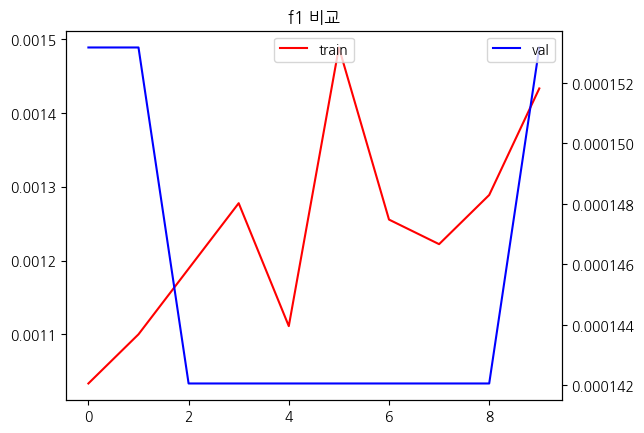

In [77]:
### Loss와 Acc F1 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

metric = 'f1'
fig, ax1 = plt.subplots()
ax1.plot(train_[metric], label='train', color='red')

ax2 = ax1.twinx()
ax2.plot(val_[metric], label='val', color='blue')

# ax3 = ax1.twinx()
# ax3.plot(train_['f1'], label='f1', color='orange')
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.title(f'{metric} 비교')

plt.show()